<a href="https://colab.research.google.com/github/ronaldmaj/data-analysis-notebooks/blob/master/POLA_Project_3_-_Colab_Ship_Detection_in_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ship Detection in Sample Image

In this Notebook we will try to identify the ships in an example satellite image. 

We will use the model train in the previous notebook, loading it in and then running a sliding window through the entire image

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls 'gdrive/My Drive/ships_sat3'

1102960_1154610_2018-01-23_1002_RGB_Visual_clip.png  json  models  test  train


In [0]:
# Import Packages
import imageio
import json, sys, random
import numpy as np
import matplotlib.pyplot as plt
import datetime 

!pip3 install https://github.com/OlafenwaMoses/ImageAI/releases/download/2.0.2/imageai-2.0.2-py3-none-any.whl



    100% |████████████████████████████████| 153kB 1.2MB/s 


In [0]:
# Load satellite image
im = imageio.imread('gdrive/My Drive/ships_sat3/1102960_1154610_2018-01-23_1002_RGB_Visual_clip.png')

In [0]:
# Check models avaialbe
!ls 'gdrive/My Drive/ships_sat3/models'

model_ex-016_acc-0.932920.h5  model_ex-019_acc-0.933806.h5
model_ex-017_acc-0.933806.h5  model_ex-020_acc-0.933806.h5
model_ex-018_acc-0.934397.h5


In [0]:
path = 'gdrive/My Drive/ships_sat3/'

# Load model 2 - three categories: ship, not_ship and partial_ship
from imageai.Prediction.Custom import CustomImagePrediction
prediction2 = CustomImagePrediction()
prediction2.setModelTypeAsResNet()
prediction2.setModelPath(path+"models/model_ex-017_acc-0.933806.h5")
prediction2.setJsonPath(path+"json/model_class.json")
prediction2.loadModel(num_objects=3)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Function for generating window and its coordinates
def window_gen(image, step_size):
    for y in range(0, image.shape[0], step_size):
        for x in range(0, image.shape[1], step_size):
            yield (x, y, image[y:y+80, x:x+80, 0:3])

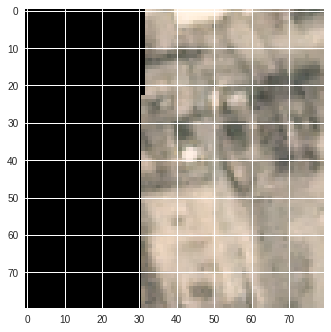

{'not_ship': '99.63210821151733', 'partial_ship': '0.34333905205130577', 'ship': '0.02455142675898969'}
The coordinates for the random image are: ((0, 80), (0, 80))
-----------------------


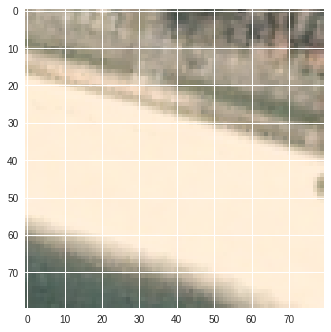

{'not_ship': '99.99536275863647', 'partial_ship': '0.002997215233335737', 'ship': '0.001642366623855196'}
The coordinates for the random image are: ((540, 620), (3840, 3920))
-----------------------


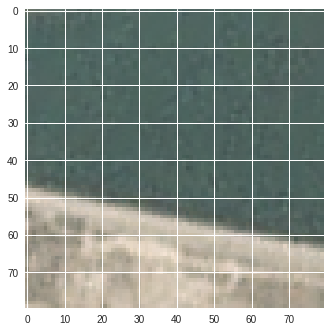

{'partial_ship': '92.96956658363342', 'not_ship': '7.017902284860611', 'ship': '0.012525080819614232'}
The coordinates for the random image are: ((1140, 1220), (1440, 1520))
-----------------------


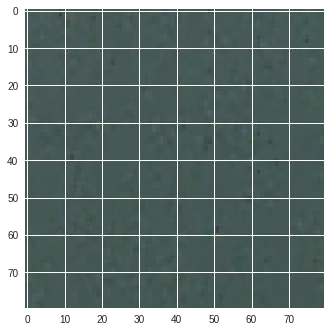

{'not_ship': '96.22634649276733', 'partial_ship': '3.670668974518776', 'ship': '0.10298402048647404'}
The coordinates for the random image are: ((1680, 1760), (5280, 5360))
-----------------------


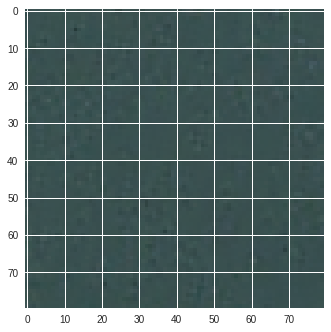

{'not_ship': '95.57742476463318', 'partial_ship': '4.326734691858292', 'ship': '0.09584070066921413'}
The coordinates for the random image are: ((2280, 2360), (2880, 2960))
-----------------------
The time taken to search all the sqaures in the image is: 0:02:17.515376


In [0]:
# Run a for loop over the entire image, moving the bounding box by 60 pixels at a time, as a test case:

start3 = datetime.datetime.now()
for i,(x, y, win_im) in enumerate(window_gen(im, step_size=60)):
    result = prediction2.predictImage(win_im, result_count=3, input_type='array')
    names = result[0]
    probs = result[1]
    result_dict = {name:prob for (name, prob) in zip(names,probs)}
    if float(result_dict['ship']) > 95:
        plt.figure()
        plt.imshow(win_im)
        plt.show()
        print(f'The coordinates for the ship image are: {(y, y+80), (x, x+80)}')
        print("-----------------------")
    if i % 1000 == 0:
        plt.figure()
        plt.imshow(win_im)
        plt.show()
        print(result_dict)
        print(f'The coordinates for the random image are: {(y, y+80), (x, x+80)}')
        print("-----------------------")        
end3 = datetime.datetime.now()
comp_time3 = end3 - start3
print(f'The time taken to search all the sqaures in the image is: {comp_time3}')

The time taken to go through one image is about 10 times faster than it occurs on my laptop computer, so this is definitely a better way to go about searching through the image.

Let's try a finer window size:

In [0]:
# Write a function to make it faster:
 
def search_image(image, step_size):

  for i,(x, y, win_im) in enumerate(window_gen(image, step_size=step_size)):
      result = prediction2.predictImage(win_im, result_count=3, input_type='array')
      names = result[0]
      probs = result[1]
      result_dict = {name:prob for (name, prob) in zip(names,probs)}
      if float(result_dict['ship']) > 95:
          plt.figure()
          plt.imshow(win_im)
          plt.show()
          for key in result_dict:
              print(key, " : " , result_dict[key])
              print("-----------------------")
          print(f'The coordinates for the ship image are: {(y, y+80), (x, x+80)}')
          print("-----------------------")   


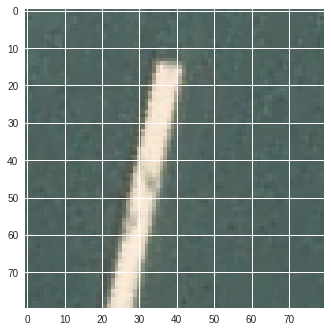

ship  :  95.45840620994568
-----------------------
not_ship  :  4.123647511005402
-----------------------
partial_ship  :  0.4179473966360092
-----------------------
The coordinates for the ship image are: ((1100, 1180), (1560, 1640))
-----------------------


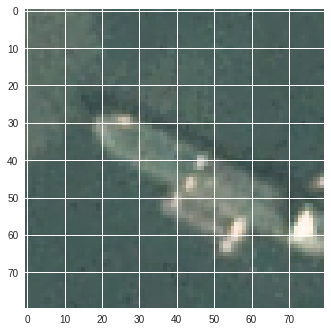

ship  :  95.5435574054718
-----------------------
not_ship  :  3.230873867869377
-----------------------
partial_ship  :  1.225562859326601
-----------------------
The coordinates for the ship image are: ((1560, 1640), (1900, 1980))
-----------------------


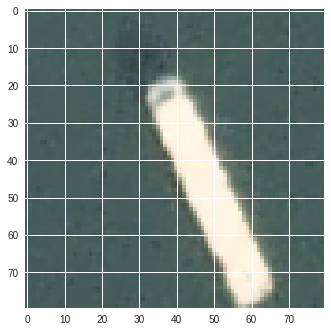

ship  :  95.15948295593262
-----------------------
not_ship  :  2.5401759892702103
-----------------------
partial_ship  :  2.3003412410616875
-----------------------
The coordinates for the ship image are: ((1700, 1780), (1720, 1800))
-----------------------


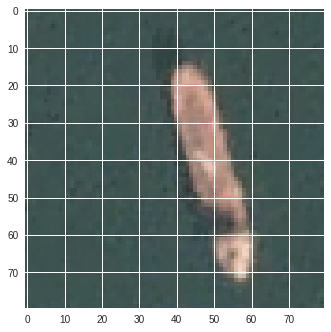

ship  :  98.52555990219116
-----------------------
partial_ship  :  0.9711203165352345
-----------------------
not_ship  :  0.5033208057284355
-----------------------
The coordinates for the ship image are: ((1760, 1840), (3820, 3900))
-----------------------


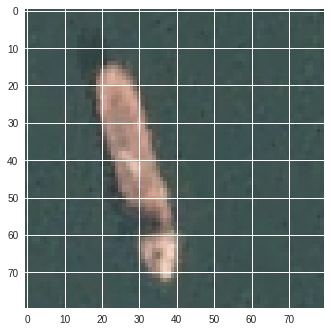

ship  :  98.33118915557861
-----------------------
partial_ship  :  1.019525807350874
-----------------------
not_ship  :  0.6492879241704941
-----------------------
The coordinates for the ship image are: ((1760, 1840), (3840, 3920))
-----------------------


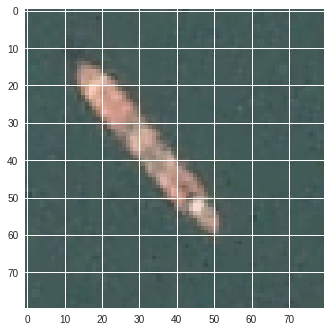

ship  :  99.22906756401062
-----------------------
partial_ship  :  0.5485017783939838
-----------------------
not_ship  :  0.22243568673729897
-----------------------
The coordinates for the ship image are: ((1960, 2040), (1680, 1760))
-----------------------


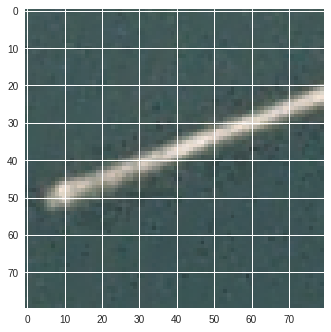

ship  :  95.18923163414001
-----------------------
not_ship  :  4.544734209775925
-----------------------
partial_ship  :  0.2660405123606324
-----------------------
The coordinates for the ship image are: ((2280, 2360), (1220, 1300))
-----------------------


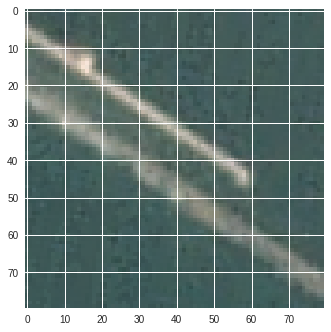

ship  :  96.4792013168335
-----------------------
not_ship  :  2.6435980573296547
-----------------------
partial_ship  :  0.8772028610110283
-----------------------
The coordinates for the ship image are: ((2420, 2500), (300, 380))
-----------------------


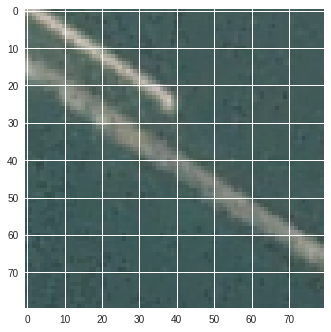

ship  :  97.00199961662292
-----------------------
not_ship  :  2.4988651275634766
-----------------------
partial_ship  :  0.49913208931684494
-----------------------
The coordinates for the ship image are: ((2440, 2520), (320, 400))
-----------------------
The time taken to search all the sqaures in the image is: 0:20:37.369066


In [0]:
start = datetime.datetime.now()
search_image(im, 20)
end = datetime.datetime.now()
comp_time = end - start
print(f'The time taken to search all the sqaures in the image is: {comp_time}')

This now takes over 20 minutes. 

To increase the speed further, we will try to parallelize the process. This will involve creating a function for the testing of the image and having a separate array for the image windows that will be mapped using that function. 

In [0]:
''' 
Firstly, we create the function:'''

def calc_prob(inputs):
  im_win, x, y = inputs
  result = prediction2.predictImage(win_im, result_count=3, input_type='array')
  names = result[0]
  probs = result[1]
  result_dict = {name:prob for (name, prob) in zip(names,probs)}
  if float(result_dict['ship']) > 95:
      #plt.figure()
      #plt.imshow(win_im)
      #plt.show()
      #for key in result_dict:
      #    print(key, " : " , result_dict[key])
      #    print("-----------------------")
      #print(f'The coordinates for the ship image are: {(y, y+80), (x, x+80)}')
      #print("-----------------------")
      return (y,x)
  else:
      return None

# And next we create the array for the images and coordinates:
inputs_list = tuple(window_gen(im, step_size=80))

In [0]:
len(inputs_list)

2574

In [0]:
# Lets see how long it takes to run a mapping function:
start = datetime.datetime.now()
ex_run = tuple(map(calc_prob, inputs_list))
end = datetime.datetime.now()
comp_time = end - start
print(f'The time taken to search all the squares in the image is: {comp_time}')

The time taken to search all the squares in the image is: 0:01:14.194243


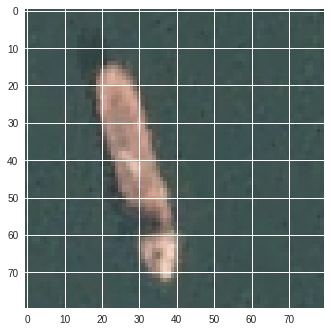

ship  :  98.33118915557861
-----------------------
partial_ship  :  1.019525807350874
-----------------------
not_ship  :  0.6492879241704941
-----------------------
The coordinates for the ship image are: ((1760, 1840), (3840, 3920))
-----------------------
The time taken to search all the sqaures in the image is: 0:01:14.691481


In [0]:
# And compare to how long it takes to the previous method
start = datetime.datetime.now()
search_image(im, 80)
end = datetime.datetime.now()
comp_time = end - start
print(f'The time taken to search all the sqaures in the image is: {comp_time}')

In [0]:
# Let's see if running this with multiprocessing improves the speed:
import multiprocessing

multiprocessing.cpu_count()

2

In [0]:
''' 
Running the code below produced no result within 10 min, therefore it is not
faster than the previous method for checking the images used previously
'''

#start = datetime.datetime.now()

#pro_pool = multiprocessing.Pool()
#prob_res = tuple(pro_pool.map(calc_prob, inputs_list))

#end = datetime.datetime.now()
#comp_time = end - start
#print(f'The time taken to search all the squares in the image is: {comp_time}')


In [0]:
''' 
Therefore we will just run the previous code on a smaller sliding window which
moves in motions of 8 pixels at a time:
'''

start = datetime.datetime.now()
search_image(im, 8)
end = datetime.datetime.now()
comp_time = end - start
print(f'The time taken to search all the sqaures in the image is: {comp_time}')